In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
file_name = 'Sample Data.xlsx'
sample_df = pd.read_excel(file_name, header=1)
sample_df.shape

(120411, 63)

In [4]:
sample_df['DECISION_XCD'] = sample_df['DECISION_XCD'].map({'T':0, 'F':1})
sample_df['DECISION_XCD'].value_counts()

0    105599
1     14812
Name: DECISION_XCD, dtype: int64

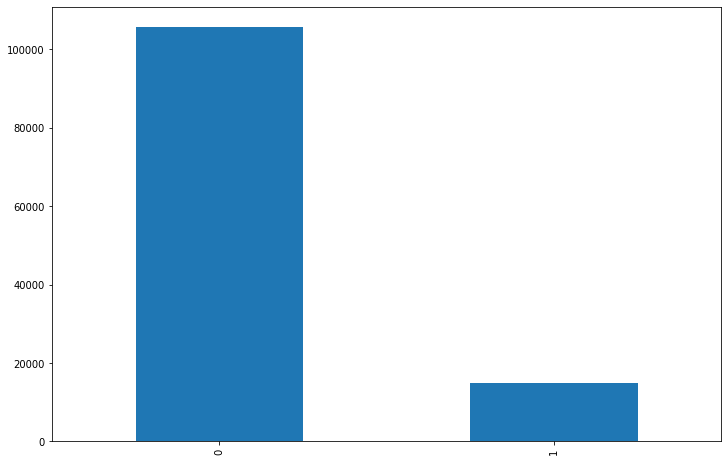

In [110]:
plt.figure(figsize=(12,8))
sample_df['DECISION_XCD'].value_counts().plot.bar()
plt.show()

In [6]:
round((sample_df.isnull().sum()/len(sample_df.index))*100,2)

Field                               0.00
ACCOUNT_EXPIRATION_DT               0.00
ACQUIRER_COUNTRY_XCD                2.43
ACQUIRER_MERCHANT_XID             100.00
ACQUIRER_XID                        0.06
ADDRESSLINE1                        0.36
ADDRESSLINE2                       89.98
AUTHORIZATION_POSTING_XCD           0.00
CARD_EXPIRATION_DT                  0.00
CARD_ISSUE_DT                       0.00
CARD_OPEN_DT                        0.00
CARD_TYPE_XCD                       0.00
CARDHOLDER_PRESENT_XFLG             0.00
CELLPHONE                          44.65
CENSUS_BLOCK                        3.03
CITY                                0.51
COUNTRY_XCD                         0.32
CUSTOMER_BIRTH_DT                   0.32
CUSTOMER_GENDER_XCD                 0.32
DECISION_XCD                        0.00
FI_TRANSACTION_ID                   0.00
FNAME                               2.22
HOMEPHONE                           5.65
LNAME                               0.34
MERCHANT_CATEGOR

In [7]:
# how many total missing values do we have?
missing_values_count = sample_df.isnull().sum()
total_cells = np.product(sample_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("Missing data percentage: {}".format(round(percent_missing,2)))

Missing data percentage: 22.03


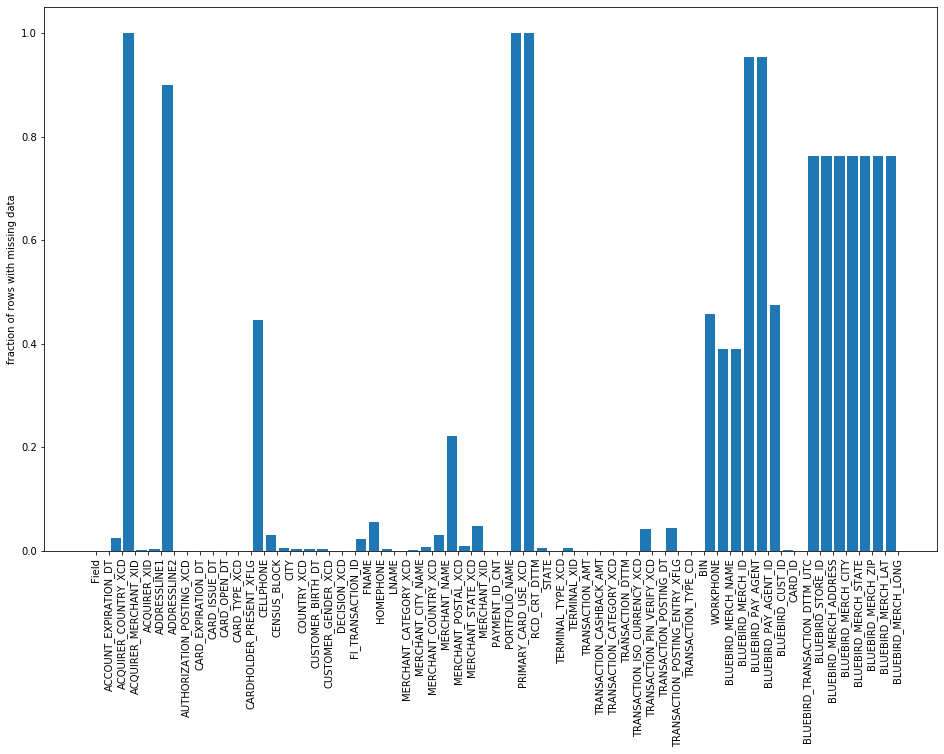

In [8]:
null_counts = sample_df.isnull().sum()/len(sample_df)
plt.figure(figsize=(16,10))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

<Figure size 1152x864 with 0 Axes>

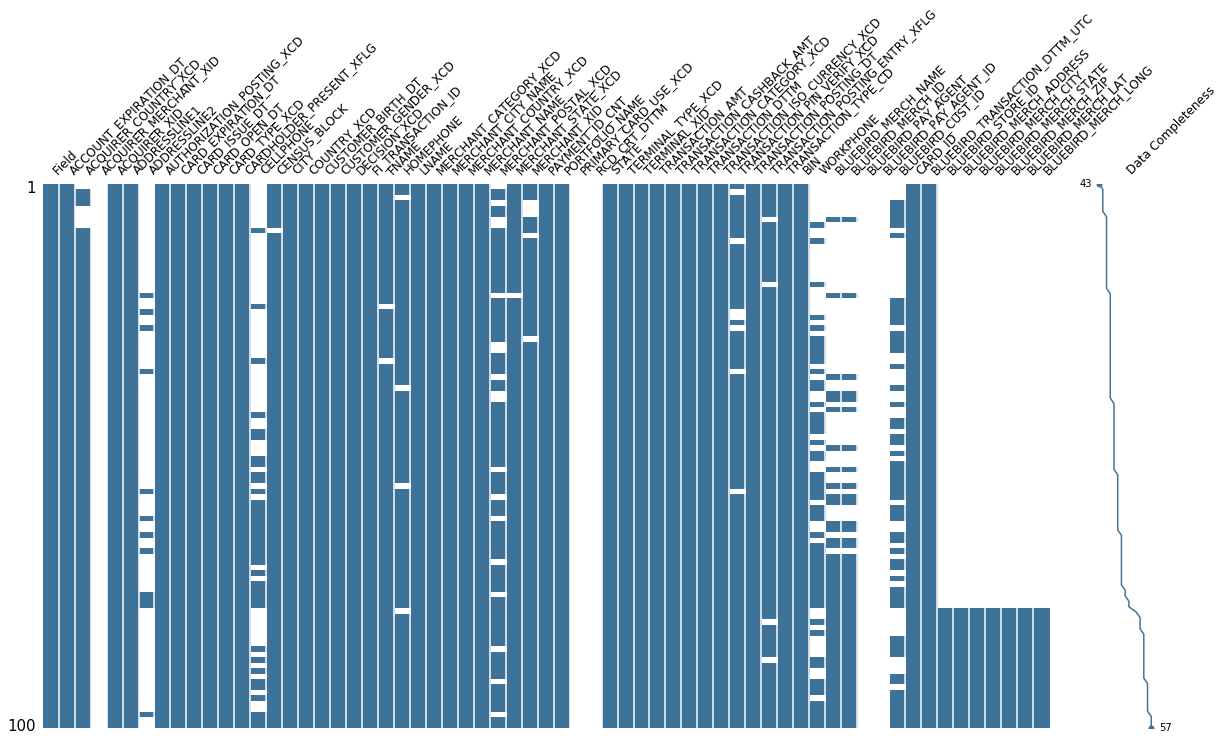

In [9]:
plt.figure(figsize=(16,12))
msno.matrix(sample_df.iloc[0:100, :],  sparkline=True, figsize=(20,10), sort='ascending', fontsize=12, labels=True, color=(0.25, 0.45, 0.6))
plt.show()

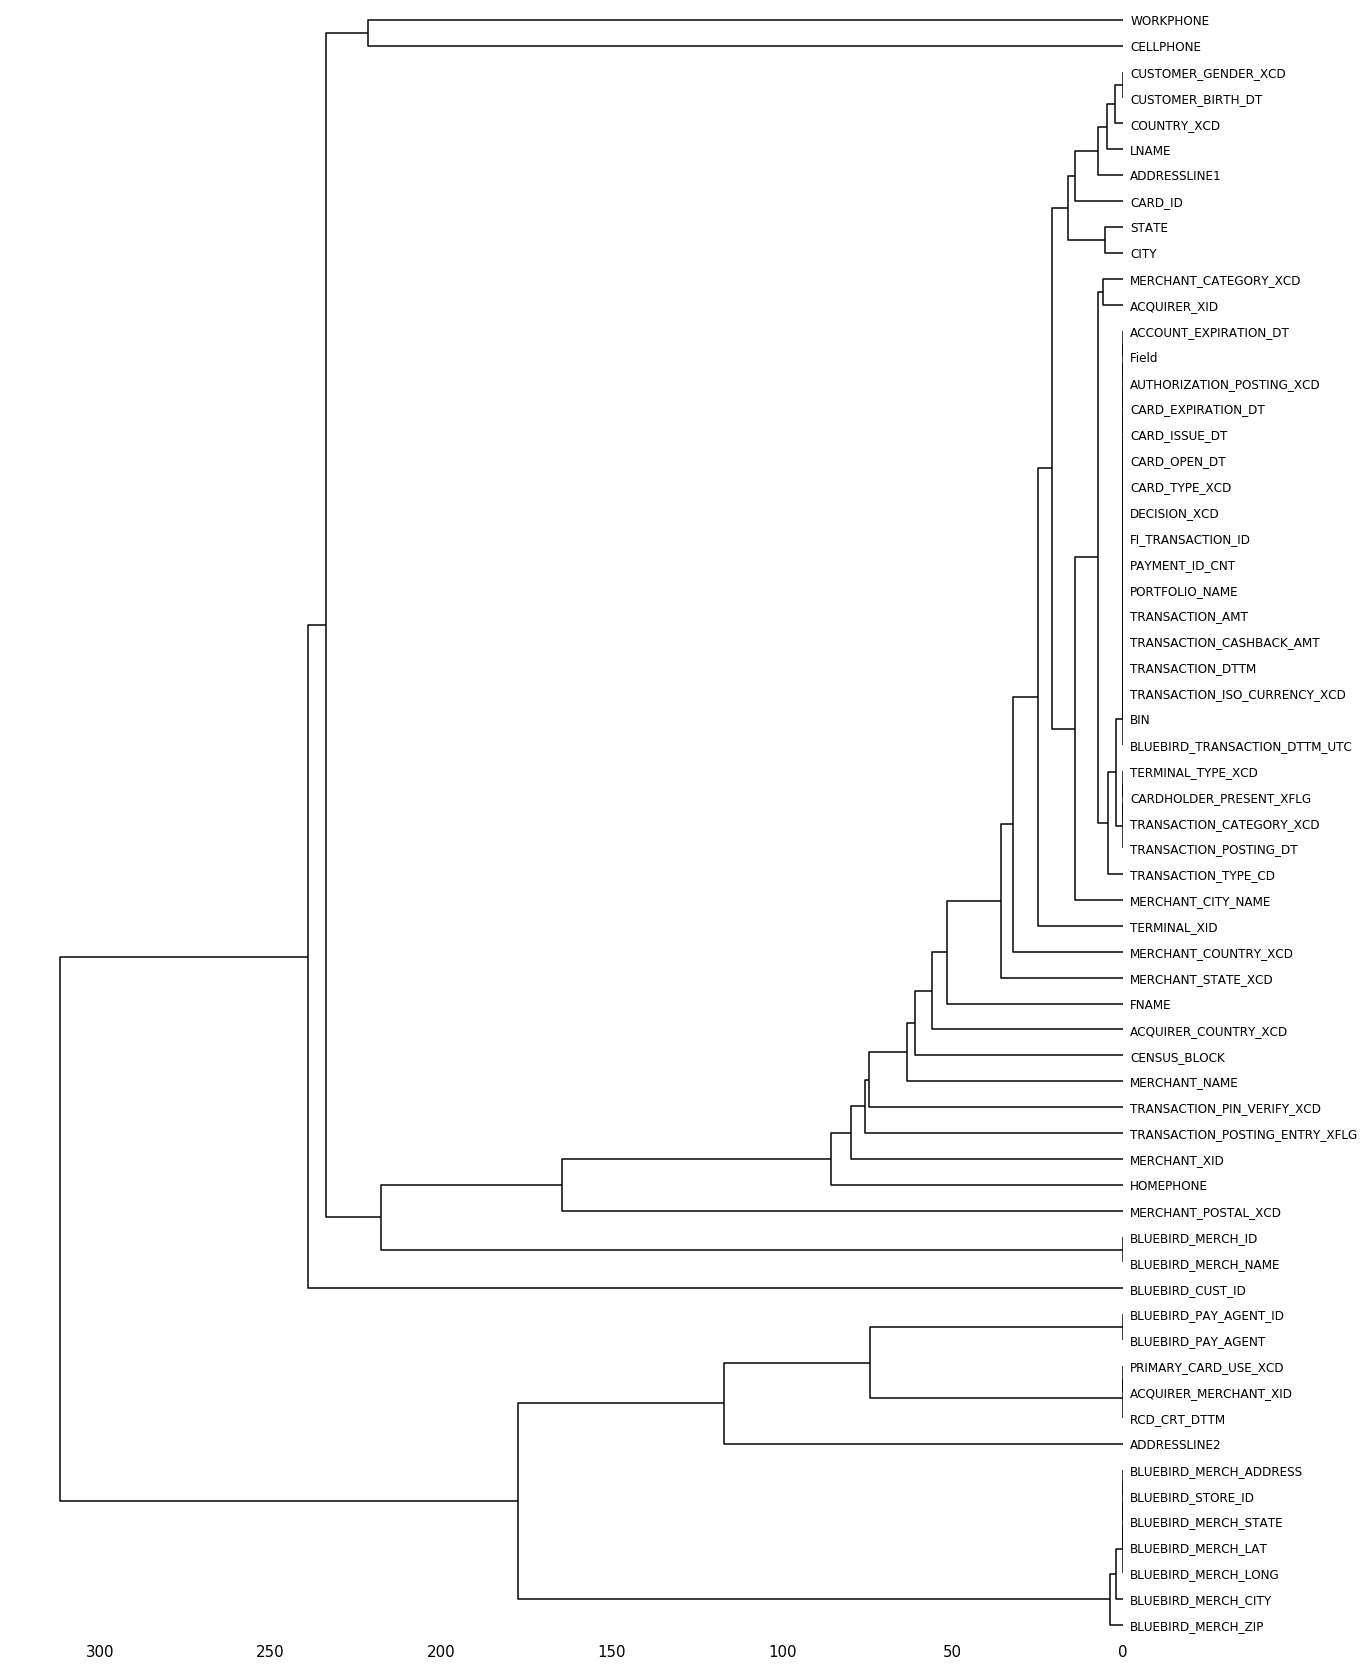

In [10]:
msno.dendrogram(sample_df,  fontsize=12, figsize=(20,30))
plt.show()

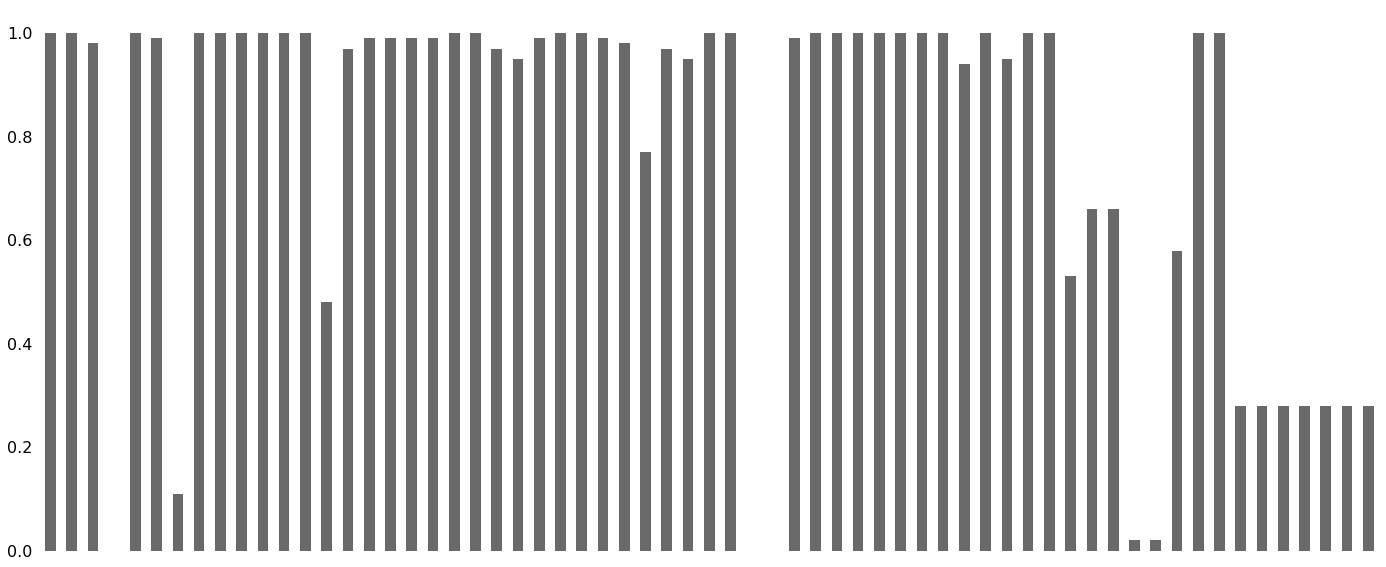

In [11]:
msno.bar(sample_df.sample(100))

<Figure size 1008x720 with 0 Axes>

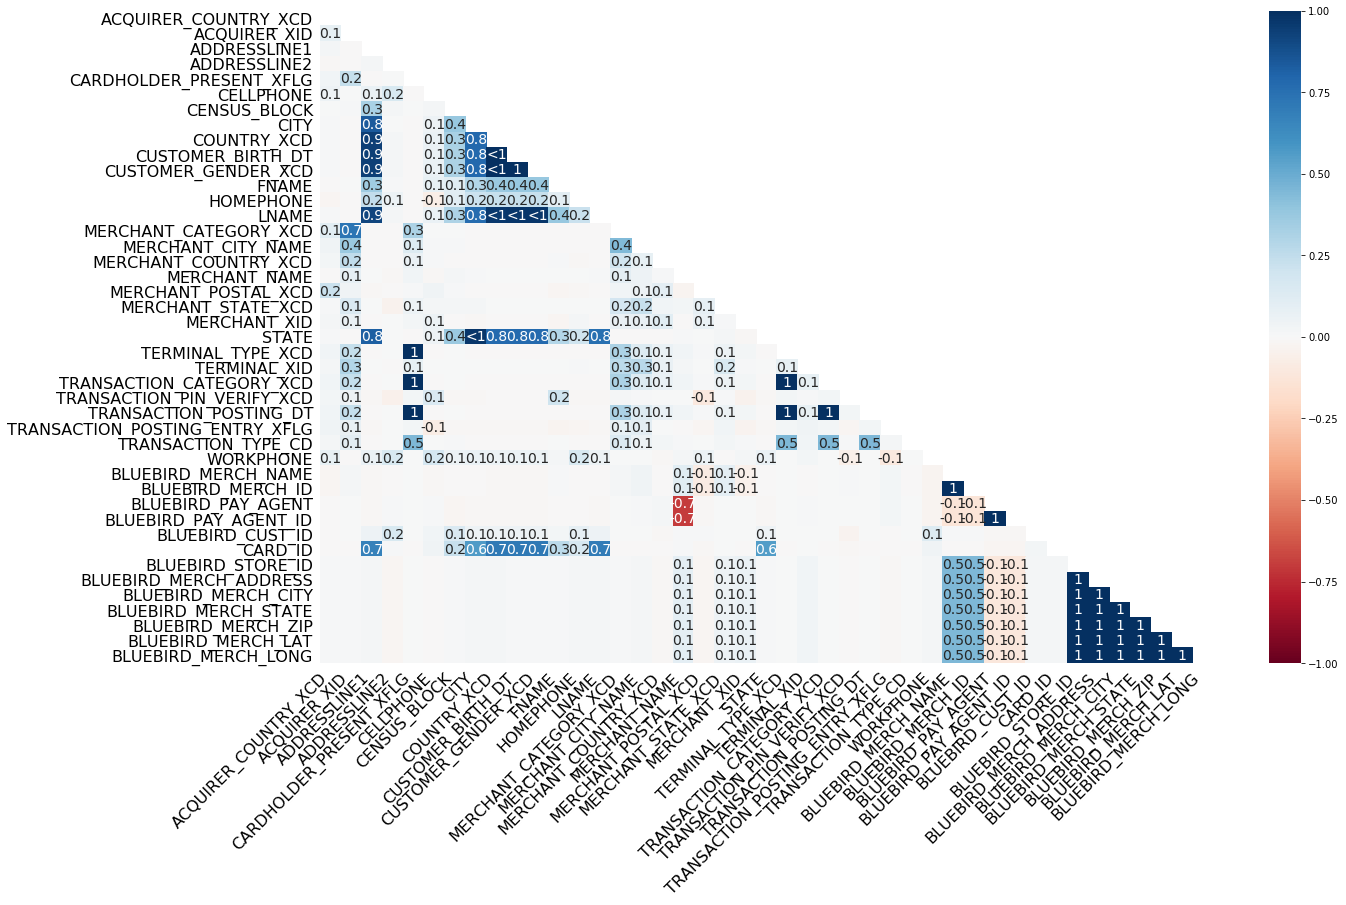

In [12]:
plt.figure(figsize=(14,10))
msno.heatmap(sample_df)
plt.show()

In [13]:
missing_columns = sample_df.columns[100*(sample_df.isnull().sum()/len(sample_df.index)) == 100]
missing_columns

Index(['ACQUIRER_MERCHANT_XID', 'PRIMARY_CARD_USE_XCD', 'RCD_CRT_DTTM'], dtype='object')

In [14]:
df_after_missing = sample_df.drop(missing_columns, axis=1)
df_after_missing.shape

(120411, 60)

In [15]:
round(df_after_missing.isnull().sum()*100/len(df_after_missing.index),2)

Field                              0.00
ACCOUNT_EXPIRATION_DT              0.00
ACQUIRER_COUNTRY_XCD               2.43
ACQUIRER_XID                       0.06
ADDRESSLINE1                       0.36
ADDRESSLINE2                      89.98
AUTHORIZATION_POSTING_XCD          0.00
CARD_EXPIRATION_DT                 0.00
CARD_ISSUE_DT                      0.00
CARD_OPEN_DT                       0.00
CARD_TYPE_XCD                      0.00
CARDHOLDER_PRESENT_XFLG            0.00
CELLPHONE                         44.65
CENSUS_BLOCK                       3.03
CITY                               0.51
COUNTRY_XCD                        0.32
CUSTOMER_BIRTH_DT                  0.32
CUSTOMER_GENDER_XCD                0.32
DECISION_XCD                       0.00
FI_TRANSACTION_ID                  0.00
FNAME                              2.22
HOMEPHONE                          5.65
LNAME                              0.34
MERCHANT_CATEGORY_XCD              0.03
MERCHANT_CITY_NAME                 0.17


In [16]:
def plot_column_barplots(col):
    plt.figure(figsize=(12,10))
    plt.subplot(2,1,1)
    null_valued_df = df_after_missing[df_after_missing[col].isnull()]
    ax = null_valued_df['DECISION_XCD'].value_counts().plot(kind='barh', figsize=(10,7),
                                            color="blue", fontsize=13);
    ax.set_alpha(0.8)
    #ax.set_title("Where were the battles fought?", fontsize=18)
    ax.set_xlabel("Distribution of Null values for "+col, fontsize=18);
    #ax.set_xticks([0,  20000,  40000, 60000,  80000,  100000,  120000])
    ax.set_xticks([],[])
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black', rotation=90)

    # invert for largest on top 
    ax.invert_yaxis()


    plt.subplot(2,1,2)
    ax = df_after_missing['DECISION_XCD'].value_counts().plot(kind='barh', figsize=(10,7),
                                            color="green", fontsize=13);
    ax.set_alpha(0.8)
    #ax.set_title('Percentage of Total Values: '+col, fontsize=18)
    ax.set_xlabel('Distribution of Total Values ', fontsize=18);
    #ax.set_xticks([0,  20000,  40000, 60000,  80000,  100000,  120000])
    #ax.set_xticks([],[])

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black', rotation=90)

    # invert for largest on top 
    ax.invert_yaxis()
    plt.show()



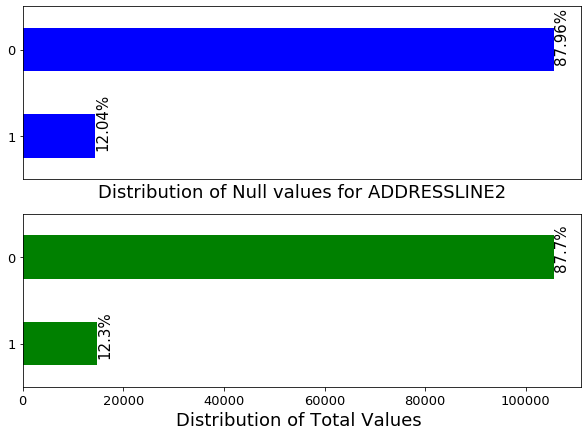

In [17]:
plot_column_barplots('ADDRESSLINE2') 

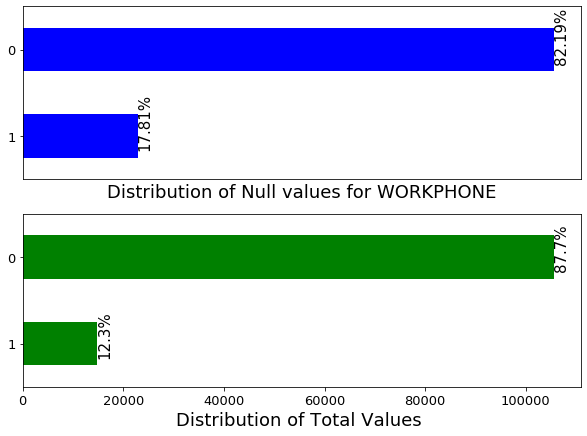

In [18]:
plot_column_barplots('WORKPHONE')

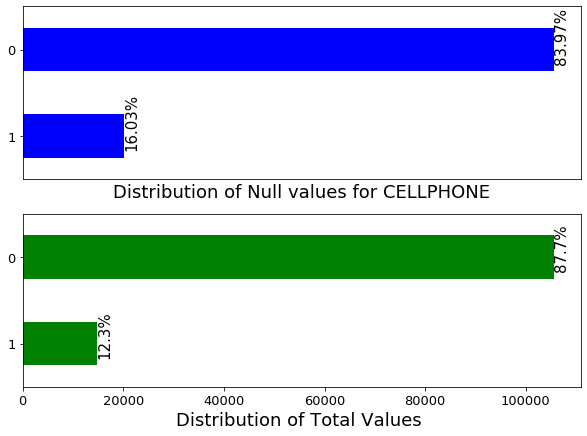

In [19]:
plot_column_barplots('CELLPHONE')

In [33]:
def plot_bars(x_col):
    plt.figure(figsize=(14,10))
    by_col = sns.barplot(x=x_col,y='DECISION_XCD', data = df_after_missing, ci=None)
    for item in by_col.get_xticklabels():
        item.set_rotation(90)
    plt.show()

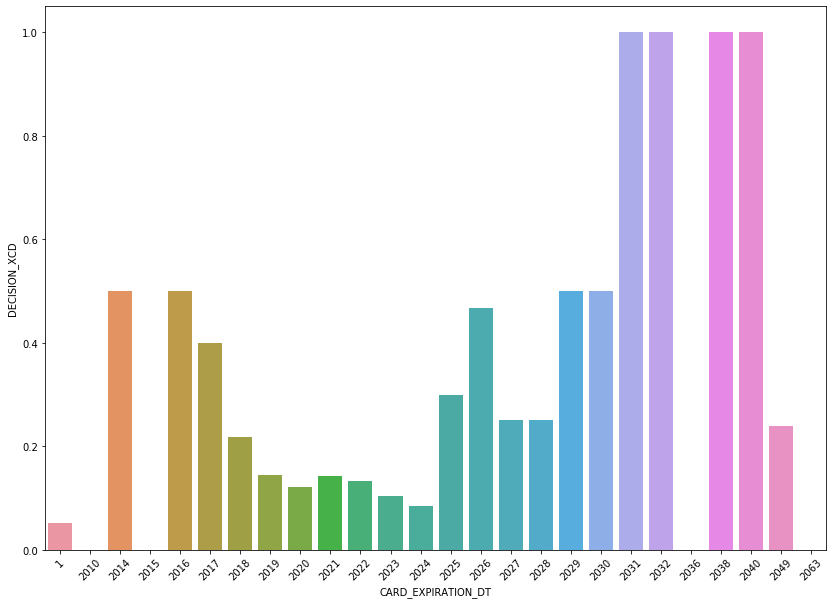

In [21]:
plot_bars('CARD_EXPIRATION_DT')

In [25]:
df_after_missing['CARD_EXPIRATION_DT'].value_counts()/df_after_missing.shape[0]*100

2021    27.040719
2020    23.850811
2022    17.675295
1        9.935139
2019     9.440998
2023     9.395321
2024     2.097815
2018     0.341331
2049     0.124573
2025     0.047338
2026     0.012457
2017     0.008305
2027     0.006644
2028     0.003322
2029     0.003322
2016     0.003322
2015     0.002491
2038     0.001661
2030     0.001661
2036     0.001661
2014     0.001661
2063     0.000830
2032     0.000830
2010     0.000830
2031     0.000830
2040     0.000830
Name: CARD_EXPIRATION_DT, dtype: float64

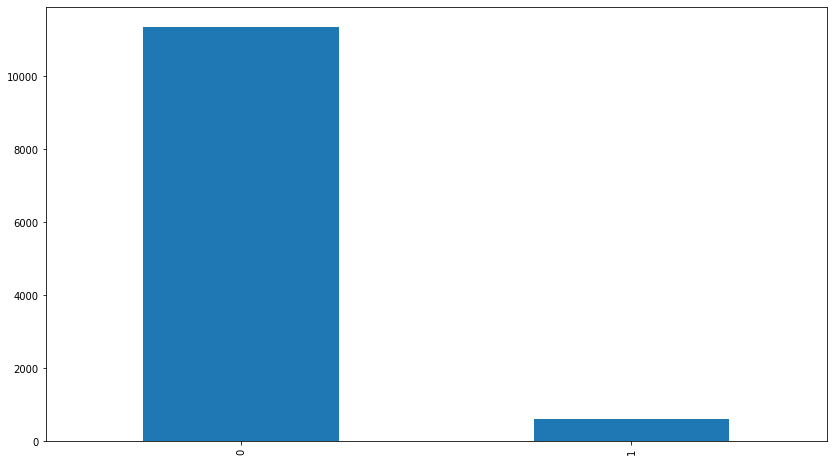

In [111]:
plt.figure(figsize=(14,8))
df_after_missing[df_after_missing['CARD_EXPIRATION_DT'] == 1]['DECISION_XCD'].value_counts().plot.bar()
plt.show()

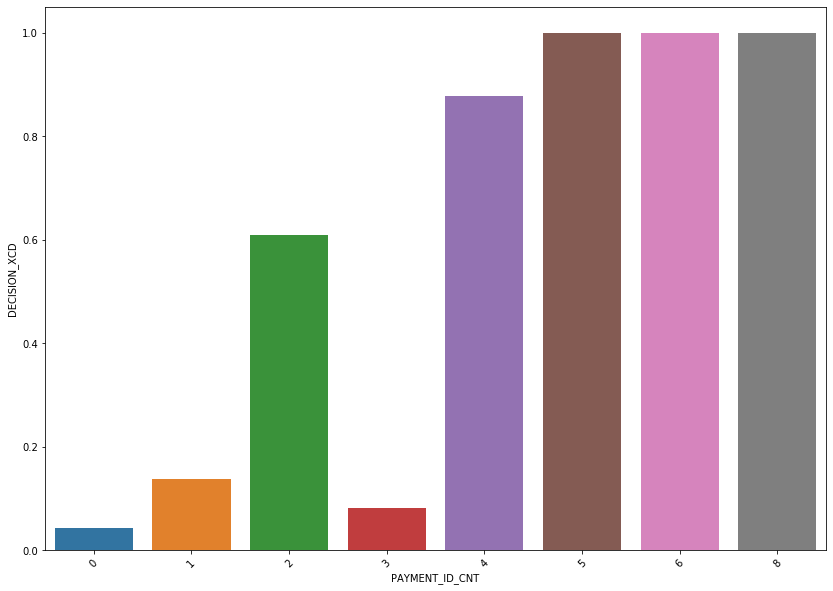

In [22]:
plot_bars('PAYMENT_ID_CNT')

In [24]:
df_after_missing['PAYMENT_ID_CNT'].value_counts()/df_after_missing.shape[0]*100

1    67.043709
0    30.024666
2     2.803731
4     0.094676
3     0.030728
8     0.000830
6     0.000830
5     0.000830
Name: PAYMENT_ID_CNT, dtype: float64

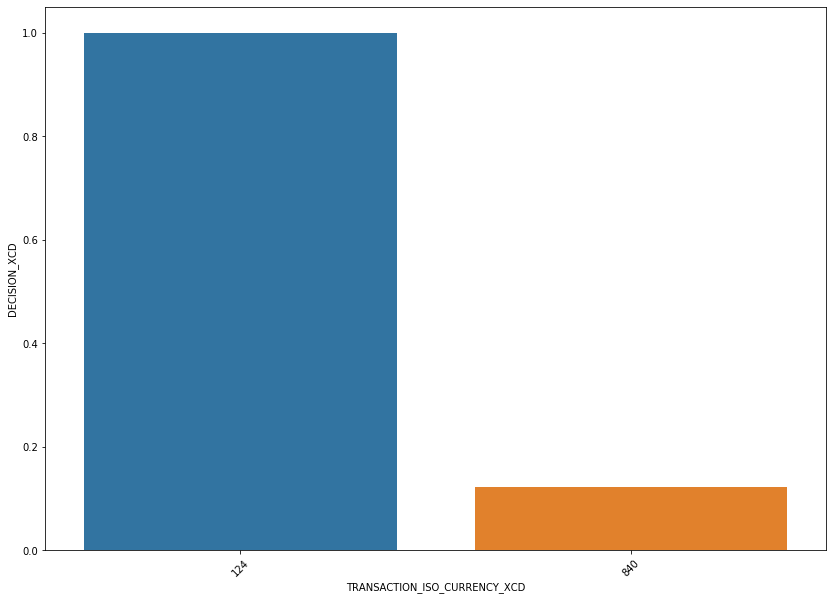

In [26]:
plot_bars('TRANSACTION_ISO_CURRENCY_XCD')

In [29]:
round(df_after_missing['TRANSACTION_ISO_CURRENCY_XCD'].value_counts()/df_after_missing.shape[0]*100,3)

840    99.999
124     0.001
Name: TRANSACTION_ISO_CURRENCY_XCD, dtype: float64

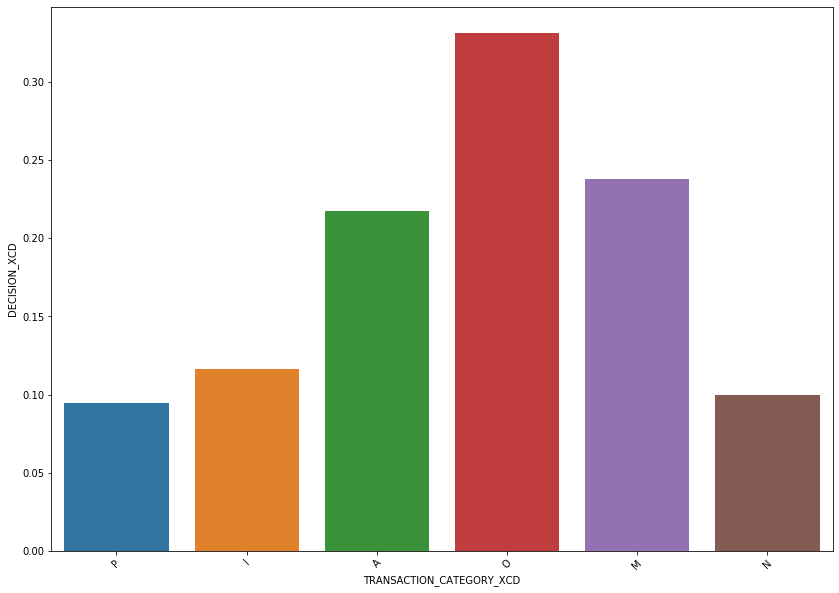

In [30]:
plot_bars('TRANSACTION_CATEGORY_XCD')

In [31]:
round(df_after_missing['TRANSACTION_CATEGORY_XCD'].value_counts()/df_after_missing.shape[0]*100,3)

P    73.407
I    12.389
O     6.993
A     3.628
M     3.404
N     0.175
Name: TRANSACTION_CATEGORY_XCD, dtype: float64

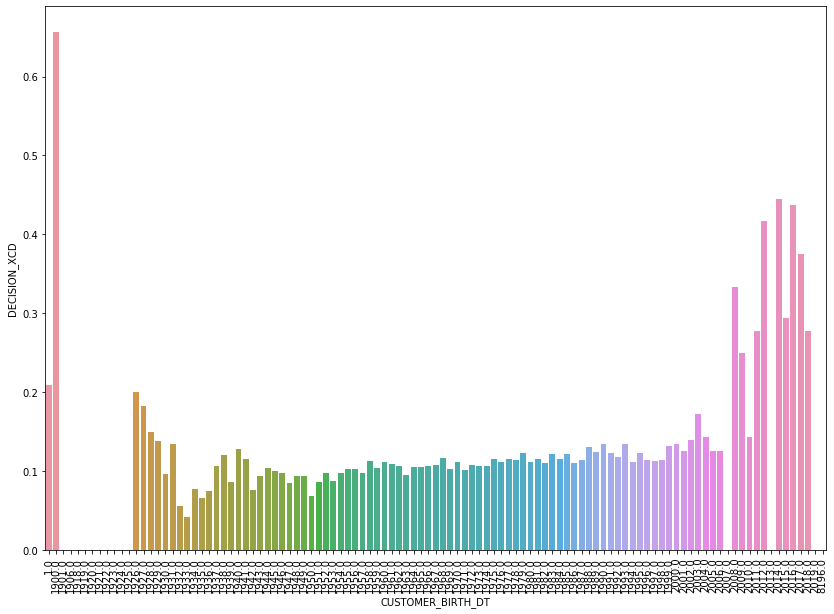

In [34]:
plot_bars('CUSTOMER_BIRTH_DT')

In [39]:
round(df_after_missing['CUSTOMER_BIRTH_DT'].value_counts()/df_after_missing.shape[0]*100,3)

1.0       9.696
1997.0    2.165
1996.0    2.054
1993.0    2.046
1998.0    2.026
1994.0    1.993
1995.0    1.961
1999.0    1.920
1990.0    1.919
1989.0    1.891
1992.0    1.870
1970.0    1.854
1991.0    1.846
1987.0    1.828
1981.0    1.820
1980.0    1.819
1985.0    1.817
1979.0    1.792
1971.0    1.776
1982.0    1.774
1986.0    1.767
1988.0    1.764
1984.0    1.750
1978.0    1.743
1977.0    1.731
1974.0    1.723
1976.0    1.705
1983.0    1.701
1968.0    1.693
1972.0    1.658
1973.0    1.639
1964.0    1.639
1969.0    1.635
1975.0    1.619
2000.0    1.571
1965.0    1.564
1962.0    1.563
1967.0    1.535
1966.0    1.530
1961.0    1.487
1963.0    1.467
1960.0    1.452
1959.0    1.359
1958.0    1.306
1957.0    1.264
1956.0    1.176
1955.0    1.124
1954.0    1.119
1953.0    1.010
1951.0    0.901
1952.0    0.899
1949.0    0.793
2001.0    0.723
1950.0    0.712
1948.0    0.711
1947.0    0.644
1946.0    0.556
1945.0    0.397
1944.0    0.368
1943.0    0.346
2002.0    0.341
1942.0    0.308
1941.0  

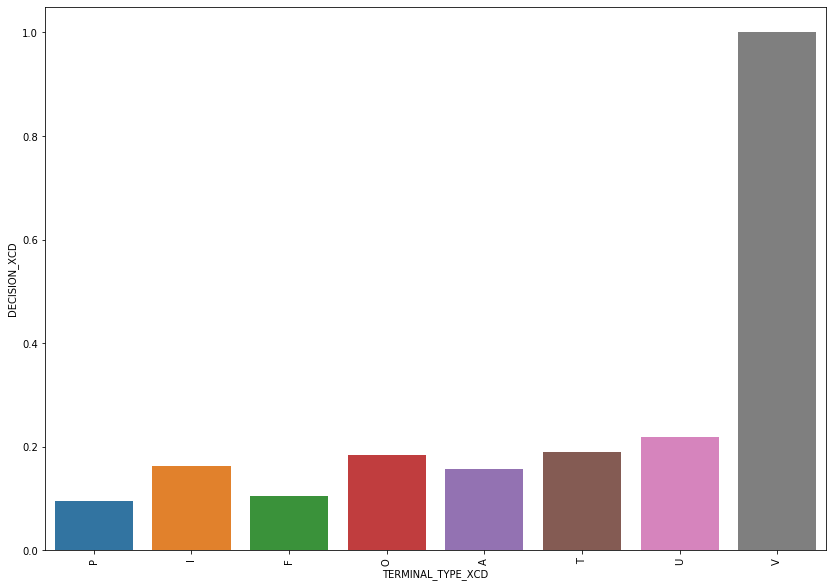

In [45]:
plot_bars('TERMINAL_TYPE_XCD')

In [46]:
round(df_after_missing['TERMINAL_TYPE_XCD'].value_counts()/df_after_missing.shape[0]*100,3)

P    53.616
I    20.059
A     9.151
O     8.621
F     8.044
T     0.276
U     0.228
V     0.002
Name: TERMINAL_TYPE_XCD, dtype: float64

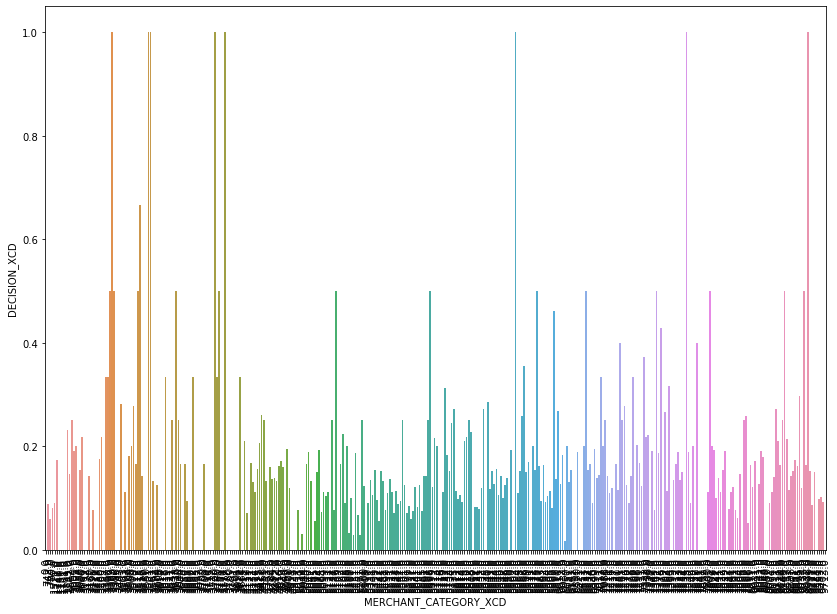

In [36]:
plot_bars('MERCHANT_CATEGORY_XCD')

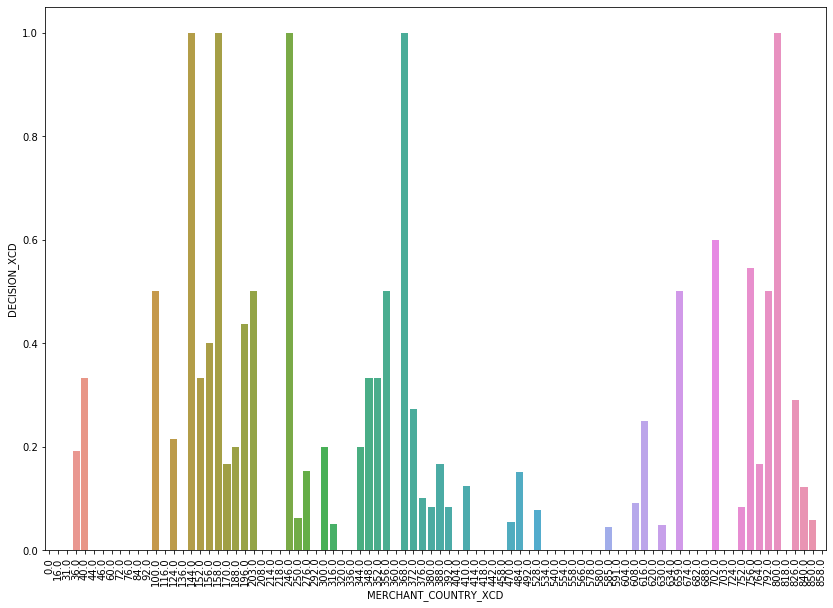

In [37]:
plot_bars('MERCHANT_COUNTRY_XCD')

In [38]:
round(df_after_missing['MERCHANT_COUNTRY_XCD'].value_counts()/df_after_missing.shape[0]*100,3)

840.0    97.807
630.0     0.676
826.0     0.164
124.0     0.077
316.0     0.032
344.0     0.029
484.0     0.027
196.0     0.027
528.0     0.022
36.0      0.022
585.0     0.018
156.0     0.017
580.0     0.017
470.0     0.015
850.0     0.014
250.0     0.013
724.0     0.013
276.0     0.011
380.0     0.010
0.0       0.010
16.0      0.010
392.0     0.010
752.0     0.010
608.0     0.009
372.0     0.009
756.0     0.009
702.0     0.008
376.0     0.008
410.0     0.007
616.0     0.007
442.0     0.006
764.0     0.005
388.0     0.005
170.0     0.005
188.0     0.004
76.0      0.004
578.0     0.004
214.0     0.004
300.0     0.004
703.0     0.003
203.0     0.003
44.0      0.002
352.0     0.002
40.0      0.002
360.0     0.002
152.0     0.002
348.0     0.002
792.0     0.002
620.0     0.002
84.0      0.002
458.0     0.002
659.0     0.002
292.0     0.002
218.0     0.002
100.0     0.002
356.0     0.002
136.0     0.002
604.0     0.002
566.0     0.002
591.0     0.002
208.0     0.002
818.0     0.001
492.0   

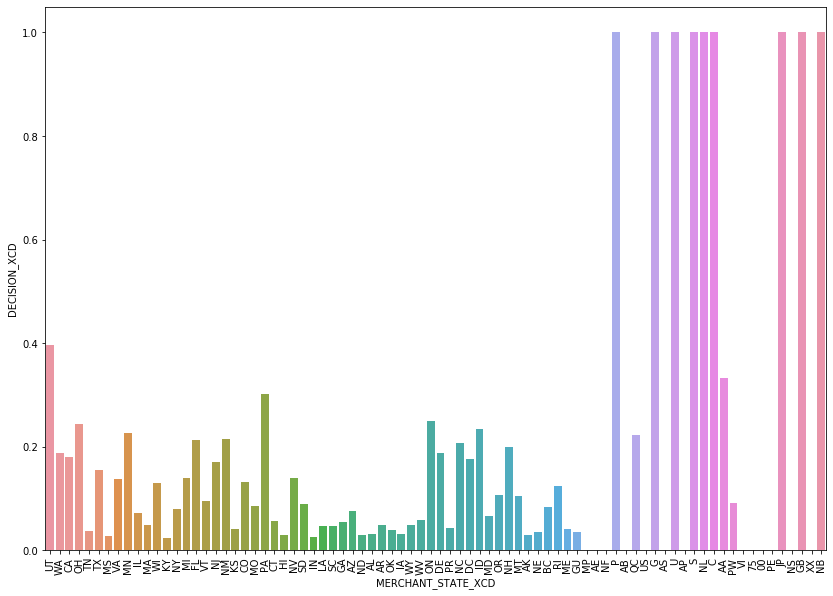

In [42]:
plot_bars('MERCHANT_STATE_XCD')

In [43]:
round(df_after_missing['MERCHANT_STATE_XCD'].value_counts()/df_after_missing.shape[0]*100,3)

CA    14.105
IL     7.245
WA     5.103
TX     4.825
MI     4.552
NY     4.373
VA     3.907
WI     3.592
PA     3.251
GA     3.224
FL     2.864
KS     2.572
LA     2.430
MS     2.346
KY     2.276
MO     2.018
TN     2.008
MA     1.935
OH     1.905
OK     1.766
AL     1.749
MN     1.703
IN     1.621
HI     1.438
NM     1.349
AR     1.243
NC     1.235
WV     1.208
CO     1.045
AZ     1.035
NJ     0.949
IA     0.829
MD     0.775
CT     0.775
SC     0.761
ID     0.583
PR     0.499
SD     0.448
UT     0.443
VT     0.431
NV     0.347
OR     0.303
ME     0.264
MT     0.239
NE     0.233
ND     0.226
DC     0.203
AK     0.194
NH     0.125
DE     0.120
RI     0.115
WY     0.084
GU     0.047
MP     0.022
ON     0.017
BC     0.010
PW     0.009
QC     0.007
AE     0.007
G      0.003
C      0.002
AB     0.002
AS     0.002
P      0.002
AA     0.002
NL     0.002
U      0.002
AP     0.002
PE     0.002
VI     0.002
75     0.001
00     0.001
JP     0.001
NB     0.001
NS     0.001
S      0.001
US     0.001

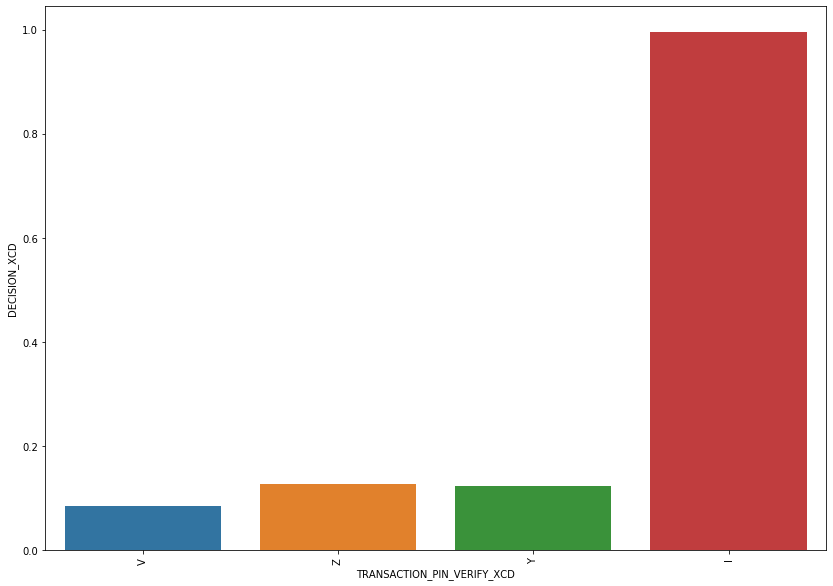

In [47]:
plot_bars('TRANSACTION_PIN_VERIFY_XCD')

In [48]:
round(df_after_missing['TRANSACTION_PIN_VERIFY_XCD'].value_counts()/df_after_missing.shape[0]*100,3)

Z    58.309
V    29.594
Y     7.476
I     0.315
Name: TRANSACTION_PIN_VERIFY_XCD, dtype: float64

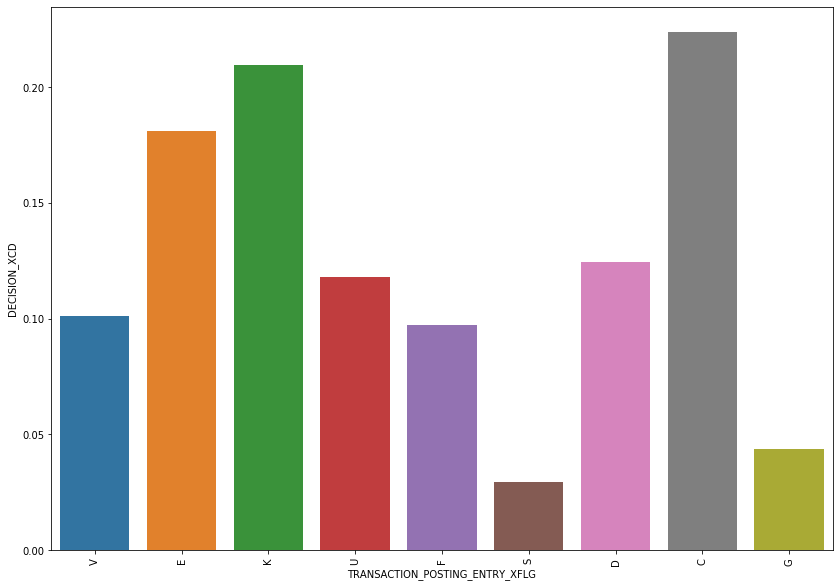

In [49]:
plot_bars('TRANSACTION_POSTING_ENTRY_XFLG')

In [51]:
round(df_after_missing['TRANSACTION_POSTING_ENTRY_XFLG'].value_counts()/df_after_missing.shape[0]*100,3)

V    41.822
E    19.142
U    17.817
K     8.047
S     7.452
F     1.079
C     0.141
D     0.140
G     0.019
Name: TRANSACTION_POSTING_ENTRY_XFLG, dtype: float64

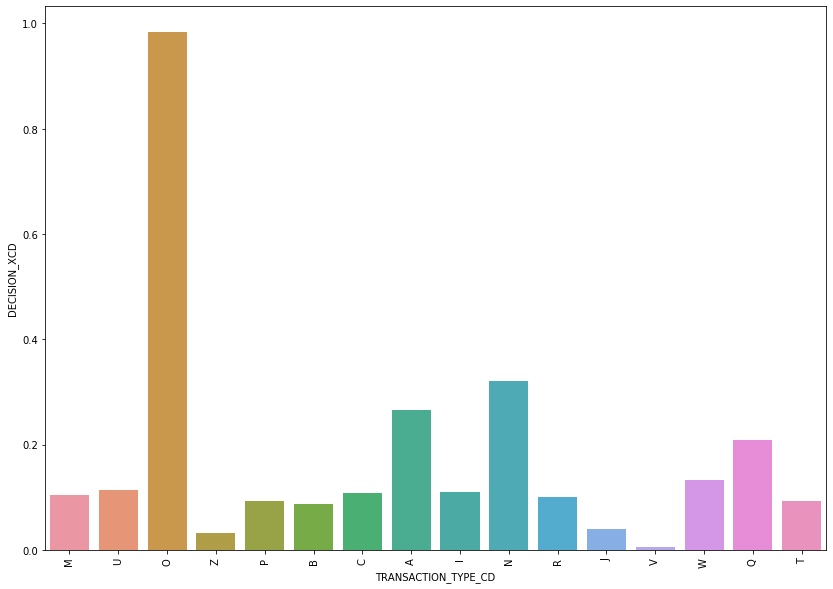

In [50]:
plot_bars('TRANSACTION_TYPE_CD')

In [52]:
round(df_after_missing['TRANSACTION_TYPE_CD'].value_counts()/df_after_missing.shape[0]*100,3)

M    66.329
Z    10.120
P     5.250
C     4.818
U     4.077
O     2.475
N     1.570
I     1.471
B     1.271
A     1.066
R     0.575
V     0.476
J     0.401
T     0.054
Q     0.020
W     0.012
Name: TRANSACTION_TYPE_CD, dtype: float64

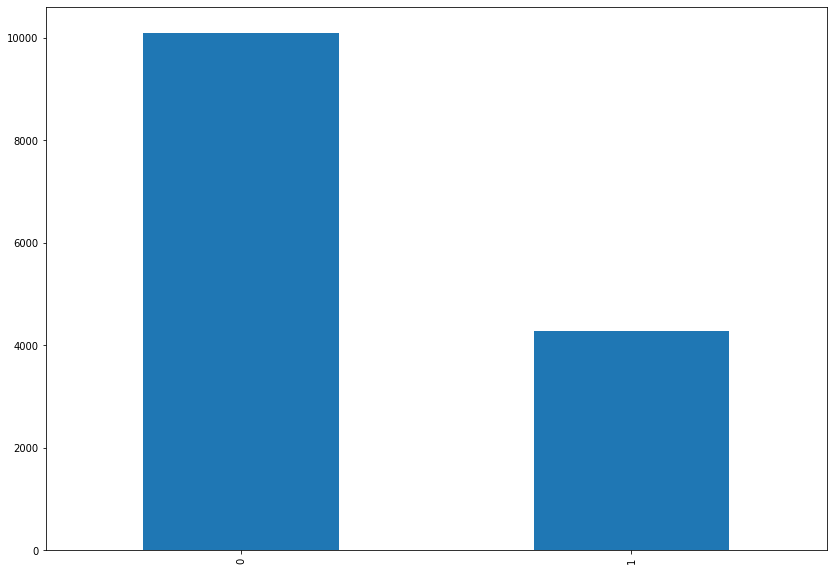

In [73]:
plt.figure(figsize=(14,10))
df_after_missing[df_after_missing['CARD_ISSUE_DT'] == '0001-01-01']['DECISION_XCD'].value_counts().plot.bar()
plt.show()

In [75]:
cleaned_dates = pd.to_datetime(df_after_missing[df_after_missing['CARD_ISSUE_DT'] != '0001-01-01']['CARD_ISSUE_DT'])
dates = cleaned_dates.apply(lambda x: x.date)
months = cleaned_dates.apply(lambda x: x.month)
years = cleaned_dates.apply(lambda x: x.year)

#.value_counts().plot.bar()

TypeError: plot_bars() missing 1 required positional argument: 'x_col'

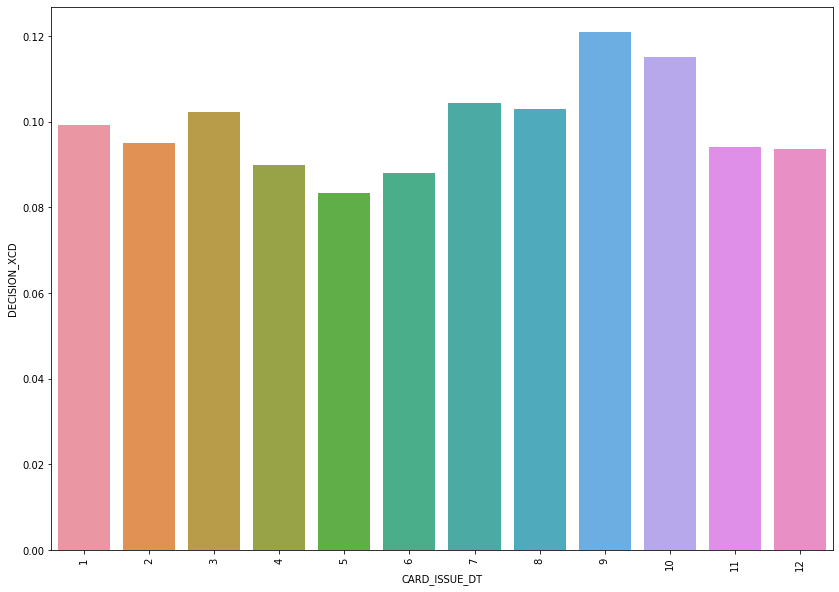

In [76]:
plot_bars(months)

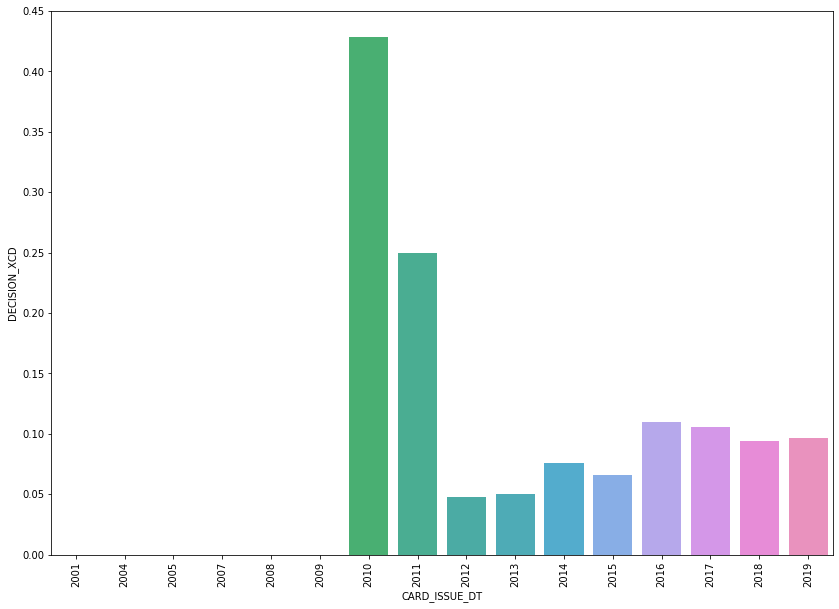

In [77]:
plot_bars(years)

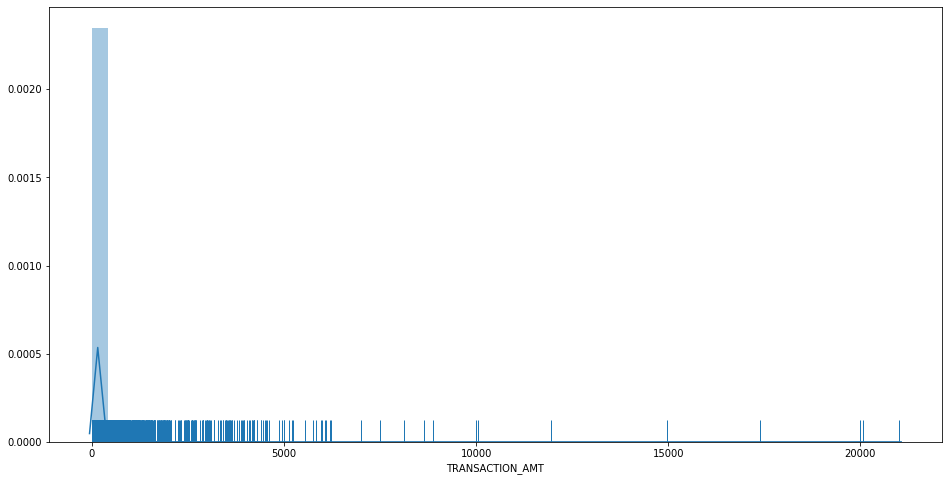

In [104]:
plt.figure(figsize=(16,8))
sns.distplot(df_after_missing['TRANSACTION_AMT'], rug=True)
plt.show()

In [99]:
def transaction_amount(amount):
    '''if amount == 0:
        return 'Zero'
    elif amount > 0 and amount <= 10:
        return '< 10'
    elif amount > 10 and amount <= 20:
        return 'b/w 10 & 20'
    elif amount > 20 and amount <= 30:
        return 'b/w 20 & 30'
    elif amount > 30 and amount <= 40:
        return 'b/w 30 & 40'
    '''
    if amount == 0:
        return 'zero'
    elif amount > 0 and amount <= 100:
        return 'b/w 50 & 100'
    elif amount > 100 and amount <= 500:
        return 'b/w 100 & 500'
    elif amount > 500 and amount <= 1000:
        return 'b/w 500 & 1 K'
    elif amount > 1000 and amount <= 5000:
        return 'b/w 10K & 5K'
    elif amount > 5000 and amount <= 10000:
        return 'b/w 5K & 10 K'    
    elif amount >= 10000 and amount < 20000:
        return 'b/w 10K & 20 K'
    else:
        return 'Greater than 20 K'
        
amnt = df_after_missing['TRANSACTION_AMT'].apply(lambda x: transaction_amount(x))

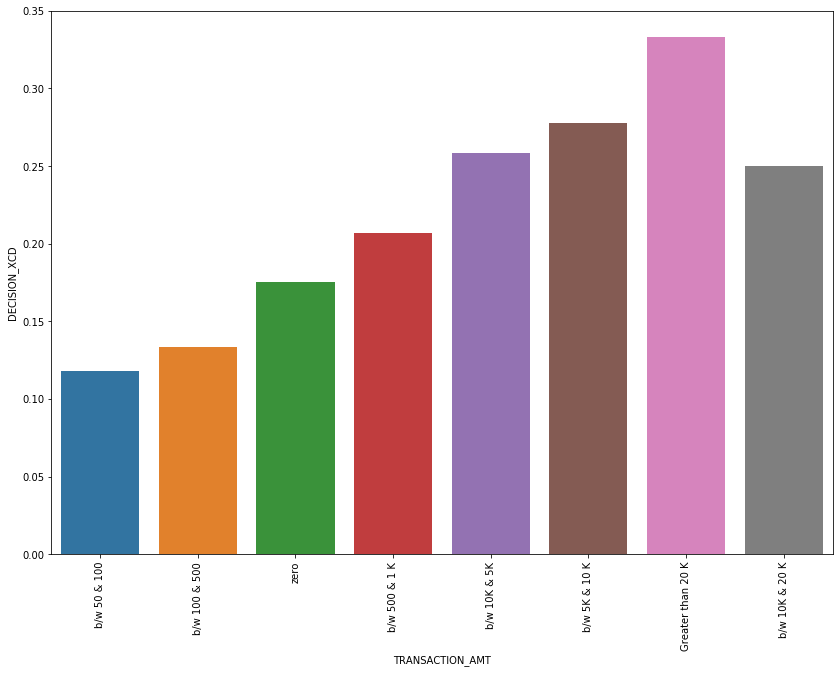

In [100]:
plot_bars(amnt)

In [101]:
amnt.value_counts()

b/w 50 & 100         103072
b/w 100 & 500         11400
zero                   4885
b/w 500 & 1 K           696
b/w 10K & 5K            333
b/w 5K & 10 K            18
b/w 10K & 20 K            4
Greater than 20 K         3
Name: TRANSACTION_AMT, dtype: int64

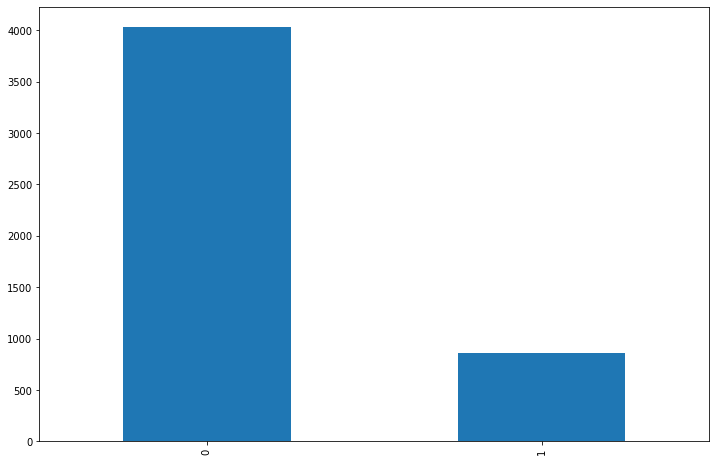

In [106]:
plt.figure(figsize=(12,8))
df_after_missing[df_after_missing['TRANSACTION_AMT'] == 0]['DECISION_XCD'].value_counts().plot.bar()
plt.show()

In [107]:
rejected_transactions = df_after_missing[df_after_missing['DECISION_XCD'] == 1]

In [108]:
rejected_transactions.shape

(14812, 60)

In [109]:
rejected_transactions.isnull().sum()

Field                                 0
ACCOUNT_EXPIRATION_DT                 0
ACQUIRER_COUNTRY_XCD               2710
ACQUIRER_XID                         66
ADDRESSLINE1                        245
ADDRESSLINE2                      13041
AUTHORIZATION_POSTING_XCD             0
CARD_EXPIRATION_DT                    0
CARD_ISSUE_DT                         0
CARD_OPEN_DT                          0
CARD_TYPE_XCD                         0
CARDHOLDER_PRESENT_XFLG               4
CELLPHONE                          8619
CENSUS_BLOCK                        708
CITY                                258
COUNTRY_XCD                         201
CUSTOMER_BIRTH_DT                   201
CUSTOMER_GENDER_XCD                 201
DECISION_XCD                          0
FI_TRANSACTION_ID                     0
FNAME                               302
HOMEPHONE                           847
LNAME                               202
MERCHANT_CATEGORY_XCD                39
MERCHANT_CITY_NAME                   65
